<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
    
<center><b><h1>Machine Learning Project</b></center>
    
<center><b><h1>23031701041 - Keshvi Piparva - 739</b></center>

<pre>    

In [ ]:
# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code |
# Systolic blood pressure | Examination Feature | ap_hi | int |
# Diastolic blood pressure | Examination Feature | ap_lo | int |
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary |
# Physical activity | Subjective Feature | active | binary |
# Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cardio_train.csv',sep = ";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df['cardio'].value_counts() 

cardio
0    35021
1    34979
Name: count, dtype: int64

In [8]:
(df['ap_lo'] <= df['ap_hi']).sum()

68766

In [9]:
corr_table = df.corr(numeric_only=True)
print(corr_table)

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.

# Cleaning & Pre-Processing

In [10]:
df.drop('id', axis=1, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
df['age_year'] = (df['age'] / 365).astype(int)

In [12]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [13]:

df = df.drop('age',axis = 1)

In [14]:
df.tail()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
69995,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,1,163,72.0,135,80,1,2,0,0,0,1,61
69999,1,170,72.0,120,80,2,1,0,0,1,0,56


In [15]:
df = df[df['ap_lo'] <= df['ap_hi']]
print("After removing incorrect BP values:", df.shape)

After removing incorrect BP values: (68766, 12)


In [16]:
df['gender'] = df['gender'].map({1: 0, 2: 1})
# female = 0
# male = 1

In [17]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [18]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,1,168,62.0,110,80,1,1,0,0,1,0,50
1,0,156,85.0,140,90,3,1,0,0,1,1,55
2,0,165,64.0,130,70,3,1,0,0,0,1,51
3,1,169,82.0,150,100,1,1,0,0,1,1,48
4,0,156,56.0,100,60,1,1,0,0,0,0,47


In [19]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['BMI'] = df['BMI'].round(2)

In [20]:
df.tail()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,BMI
69995,1,168,76.0,120,80,1,1,1,0,1,0,52,26.93
69996,0,158,126.0,140,90,2,2,0,0,1,1,61,50.47
69997,1,183,105.0,180,90,3,1,0,1,0,1,52,31.35
69998,0,163,72.0,135,80,1,2,0,0,0,1,61,27.10
69999,0,170,72.0,120,80,2,1,0,0,1,0,56,24.91


In [21]:
df = df[(df['BMI'] >= 10) & (df['BMI'] <= 60)]
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,BMI
0,1,168,62.0,110,80,1,1,0,0,1,0,50,21.97
1,0,156,85.0,140,90,3,1,0,0,1,1,55,34.93
2,0,165,64.0,130,70,3,1,0,0,0,1,51,23.51
3,1,169,82.0,150,100,1,1,0,0,1,1,48,28.71
4,0,156,56.0,100,60,1,1,0,0,0,0,47,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,168,76.0,120,80,1,1,1,0,1,0,52,26.93
69996,0,158,126.0,140,90,2,2,0,0,1,1,61,50.47
69997,1,183,105.0,180,90,3,1,0,1,0,1,52,31.35
69998,0,163,72.0,135,80,1,2,0,0,0,1,61,27.10


In [22]:
# ap_hi = Systolic Blood Pressure = The pressure when the heart beats(high number)
# ap_lo = Diastolic Blood Pressure = The pressure when the heart relaxes(low number)
# High ap_hi = higher risk of heart disease
# High ap_lo = bad for heart & blood vessels

df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

In [23]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,BMI,pulse_pressure
0,1,168,62.0,110,80,1,1,0,0,1,0,50,21.97,30
1,0,156,85.0,140,90,3,1,0,0,1,1,55,34.93,50
2,0,165,64.0,130,70,3,1,0,0,0,1,51,23.51,60
3,1,169,82.0,150,100,1,1,0,0,1,1,48,28.71,50
4,0,156,56.0,100,60,1,1,0,0,0,0,47,23.01,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,168,76.0,120,80,1,1,1,0,1,0,52,26.93,40
69996,0,158,126.0,140,90,2,2,0,0,1,1,61,50.47,50
69997,1,183,105.0,180,90,3,1,0,1,0,1,52,31.35,90
69998,0,163,72.0,135,80,1,2,0,0,0,1,61,27.10,55


In [24]:
df = df[(df['ap_hi'] >= 70) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 200)]

print("After removing BP outliers:", df.shape)

After removing BP outliers: (68607, 14)


# Visualization

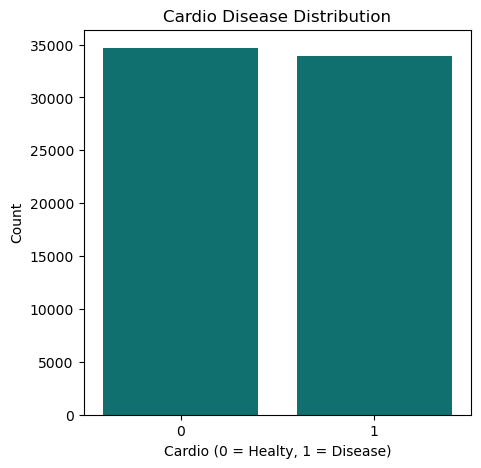

In [25]:
plt.figure(figsize = (5,5))
sns.countplot(x=df['cardio'], color='teal')
plt.title("Cardio Disease Distribution")
plt.xlabel("Cardio (0 = Healty, 1 = Disease)")
plt.ylabel("Count")
plt.show()

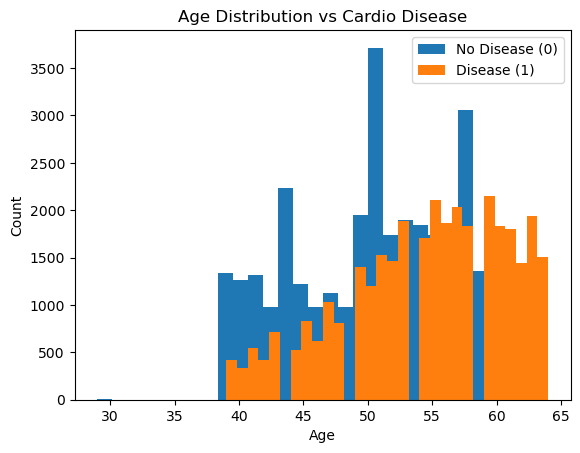

In [26]:
# Separate datasets for cardio = 0 and 1
age_0 = df[df['cardio'] == 0]['age_year']
age_1 = df[df['cardio'] == 1]['age_year']

plt.hist(age_0, bins=30,  label='No Disease (0)')
plt.hist(age_1, bins=30,  label='Disease (1)')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution vs Cardio Disease")
plt.legend()
plt.show()


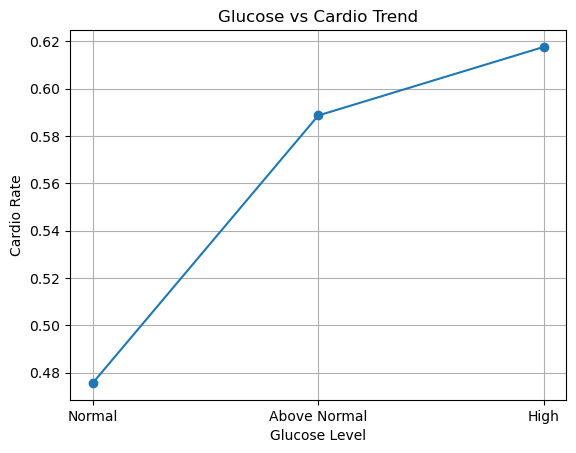

In [27]:

gluc_mean = df.groupby('gluc')['cardio'].mean().sort_index()

plt.plot(gluc_mean.index, gluc_mean.values, marker='o')
plt.xticks([1,2,3], ['Normal','Above Normal','High'])
plt.xlabel('Glucose Level')
plt.ylabel('Cardio Rate')
plt.title('Glucose vs Cardio Trend')
plt.grid(True)
plt.show()


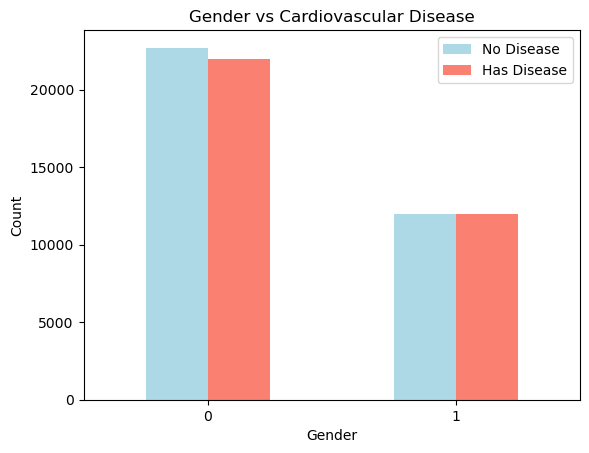

In [28]:
gender_cardio = pd.crosstab(df['gender'], df['cardio'])

gender_cardio.plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Cardiovascular Disease')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Has Disease'])
plt.show()


# save cleaned dataset.

In [29]:
df.to_csv("cardio.csv", index=False)


# Model Creation & Evaluation 

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('cardio', axis=1)   
y = df['cardio']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
#used for binary classification

LogisticRegression(max_iter=2000)

## 2. RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# It uses 200 decision trees and combines their results to predict whether a patient has cardio disease or not.

RandomForestClassifier(n_estimators=200, random_state=42)

## 3. K Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# The model looks at the 7 nearest neighbors to predict whether a patient has cardio disease or not.

KNeighborsClassifier(n_neighbors=7)

## 4. Decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 5. Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# The model builds trees one by one, where each new tree corrects the mistakes of the previous ones.

GradientBoostingClassifier(random_state=42)

## 6. Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# this algo used for continuous data like BMI,Cholesterol,etc.

GaussianNB()

### check accuracy 

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    "Logistic Regression": log_reg,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Naive Bayes": nb
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    print("="*40)
    print(name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()


Logistic Regression
Accuracy : 0.7253315843171549
Precision: 0.7284755601929375
Recall   : 0.7253315843171549
F1 Score : 0.7240510925288621
Confusion Matrix:
 [[5487 1457]
 [2312 4466]]

KNN
Accuracy : 0.6925375309721615
Precision: 0.6931542662242758
Recall   : 0.6925375309721615
F1 Score : 0.6920681214583645
Confusion Matrix:
 [[5064 1880]
 [2339 4439]]

Decision Tree
Accuracy : 0.6274595540008745
Precision: 0.6274482540460676
Recall   : 0.6274595540008745
F1 Score : 0.6272865714955529
Confusion Matrix:
 [[4500 2444]
 [2668 4110]]

Random Forest
Accuracy : 0.7106106981489578
Precision: 0.7106373951820123
Recall   : 0.7106106981489578
F1 Score : 0.7105356457585511
Confusion Matrix:
 [[5035 1909]
 [2062 4716]]

Gradient Boosting
Accuracy : 0.7316717679638537
Precision: 0.7331524905920255
Recall   : 0.7316717679638537
F1 Score : 0.7310225745838251
Confusion Matrix:
 [[5401 1543]
 [2139 4639]]

Naive Bayes
Accuracy : 0.7146917358985571
Precision: 0.7235603733797553
Recall   : 0.7146917358

In [ ]:
#Random Forest -- High recall (0.696) → detects most patients; good F1 (0.704); FN = 2062 is lowest among high recall models
#Gradient Boosting -- Slightly better F1 (0.716), recall slightly lower (0.684); slightly more patients missed
#Logistic Regression -- Moderate recall & F1 → baseline model

In [ ]:
# choose Gradient Boosting is used as Final Model
# because of high F1 score & good recall
# F1 score balances precision & recall
# Recall catches most cardio patients

In [38]:

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def train_test_split_manual(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    idx = np.random.permutation(len(X))
    test_len = int(len(X) * test_size)
    test_idx = idx[:test_len]
    train_idx = idx[test_len:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0) + 1e-8
    return (X - mean) / std, mean, std


class DecisionStump:
    def __init__(self, n_thresholds=10):
        self.feature_index = None
        self.threshold = None
        self.left_value = None
        self.right_value = None
        self.n_thresholds = n_thresholds

    def fit(self, X, residuals):
        n_samples, n_features = X.shape
        best_error = float("inf")

        for feature in range(n_features):
            thresholds = np.quantile(
                X[:, feature],
                np.linspace(0.1, 0.9, self.n_thresholds)
            )

            for t in thresholds:
                left = X[:, feature] <= t
                right = ~left

                if left.sum() == 0 or right.sum() == 0:
                    continue

                left_value = residuals[left].mean()
                right_value = residuals[right].mean()

                pred = np.where(left, left_value, right_value)
                error = np.mean((residuals - pred) ** 2)

                if error < best_error:
                    best_error = error
                    self.feature_index = feature
                    self.threshold = t
                    self.left_value = left_value
                    self.right_value = right_value

    def predict(self, X):
        return np.where(
            X[:, self.feature_index] <= self.threshold,
            self.left_value,
            self.right_value
        )

class GradientBoostingClassifierScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.stumps = []

    def fit(self, X, y):
        self.init_pred = np.zeros(len(y))
        current_pred = self.init_pred.copy()

        for _ in range(self.n_estimators):
            residuals = y - sigmoid(current_pred)

            stump = DecisionStump()
            stump.fit(X, residuals)

            update = stump.predict(X)
            current_pred += self.learning_rate * update

            self.stumps.append(stump)

    def predict_proba(self, X):
        pred = np.zeros(X.shape[0])
        for stump in self.stumps:
            pred += self.learning_rate * stump.predict(X)
        return sigmoid(pred)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


# Select features and target
features = df.drop(columns=['cardio'])
target = df['cardio'].values

X = features.values.astype(float)
y = target.astype(int)

# Scale features
X, mean, std = standardize(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

# Train model
model = GradientBoostingClassifierScratch(
    n_estimators=10,       # IMPORTANT
    learning_rate=0.1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.7067


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_acc = []
test_acc = []
estimators_range = range(1, 51)   # adjust if needed

for n in estimators_range:
    model = GradientBoostingClassifierScratch(
        n_estimators=n,
        learning_rate=0.1
    )
    model.fit(X_train, y_train)

    # Train accuracy
    y_train_pred = model.predict(X_train)
    train_acc.append(np.mean(y_train_pred == y_train))

    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_acc.append(np.mean(y_test_pred == y_test))

# Plot
plt.figure()
plt.plot(estimators_range, train_acc, marker='o')
plt.plot(estimators_range, test_acc, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting (Scratch): Underfitting vs Overfitting")
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.grid()
plt.show()


# visualization

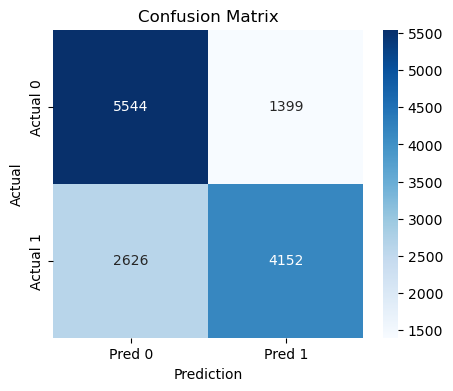

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()


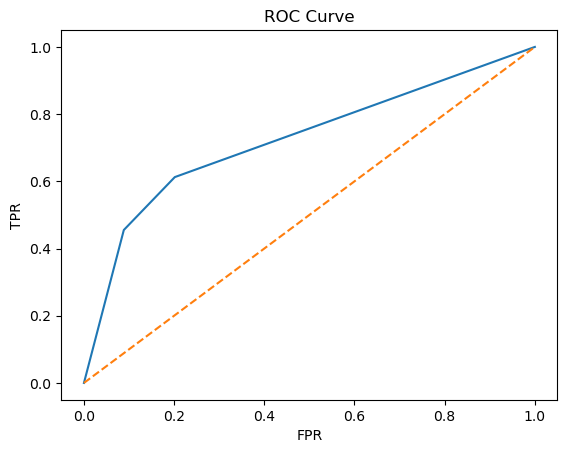

In [40]:
y_prob = model.predict_proba(X_test)

roc = [( ((y_test & (y_prob>=t)).mean() / (y_test.mean()+1e-8)),
         (((~y_test.astype(bool)) & (y_prob>=t)).mean() / ((1-y_test).mean()+1e-8)) )
       for t in np.linspace(0,1,100)]

tpr, fpr = zip(*roc)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()


C:\Users\KIRAN\AppData\Local\Temp\ipykernel_2300\2496005131.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp.values, y=imp.index, palette="viridis")


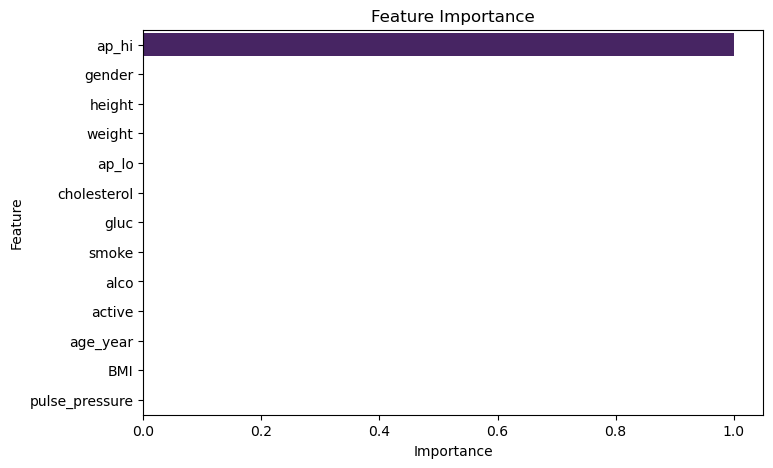

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# compute importance from stumps (1-line core logic)
imp = pd.Series([s.feature_index for s in model.stumps]).value_counts(normalize=True)

# align with feature names
imp = imp.reindex(range(len(features.columns)), fill_value=0)
imp.index = features.columns

# sort like the image
imp = imp.sort_values(ascending=False)

# plot
plt.figure(figsize=(8,5))
sns.barplot(x=imp.values, y=imp.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
